In [20]:
import pandas as pd
import numpy as np
df=pd.read_csv('movies.csv')
df.head()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [21]:
#question number 1
df['profit'] = df['gross'] - df['budget']

In [22]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'profit'],
      dtype='object')

In [23]:
df['profit'].max()

2610246203.0

In [24]:
search_value = df['profit'].max()
x = df
matching_rows = x[x['profit'] == search_value]

row_numbers = matching_rows.index.tolist()
print("Row numbers with value", search_value, ":", row_numbers)

Row numbers with value 2610246203.0 : [5445]


In [25]:
search_value = df['profit'].max()
x = df
matching_name = x[x['profit'] == search_value]

row_name = matching_name.name.tolist()
print("Row name with value", search_value, ":", row_name)

Row name with value 2610246203.0 : ['Avatar']


In [26]:
avatar_row = df[df['name'] == 'Avatar']
print(avatar_row)
print(avatar_row.index.tolist())

        name rating   genre  year                           released  score  \
5445  Avatar  PG-13  Action  2009  December 18, 2009 (United States)    7.8   

          votes       director         writer             star        country  \
5445  1100000.0  James Cameron  James Cameron  Sam Worthington  United States   

           budget         gross                company  runtime        profit  
5445  237000000.0  2.847246e+09  Twentieth Century Fox    162.0  2.610246e+09  
[5445]


In [27]:
#question number 2
df['roi'] = (df['gross'] - df['budget']) / df['budget']
average_roi_by_names = df.groupby('name')['roi'].mean()

highest_roi_names = average_roi_by_names.idxmax()
highest_roi_value = average_roi_by_names.max()
print(highest_roi_names, highest_roi_value)

Paranormal Activity 12889.386666666667


In [28]:
df['roi'].max()

12889.386666666667

In [29]:
#question number 3
df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [30]:
unique_genereslist=df['genre'].unique().tolist()
print(unique_genereslist)


['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography', 'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance', 'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport', 'Musical']


In [31]:
print(len(unique_genereslist))


19


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


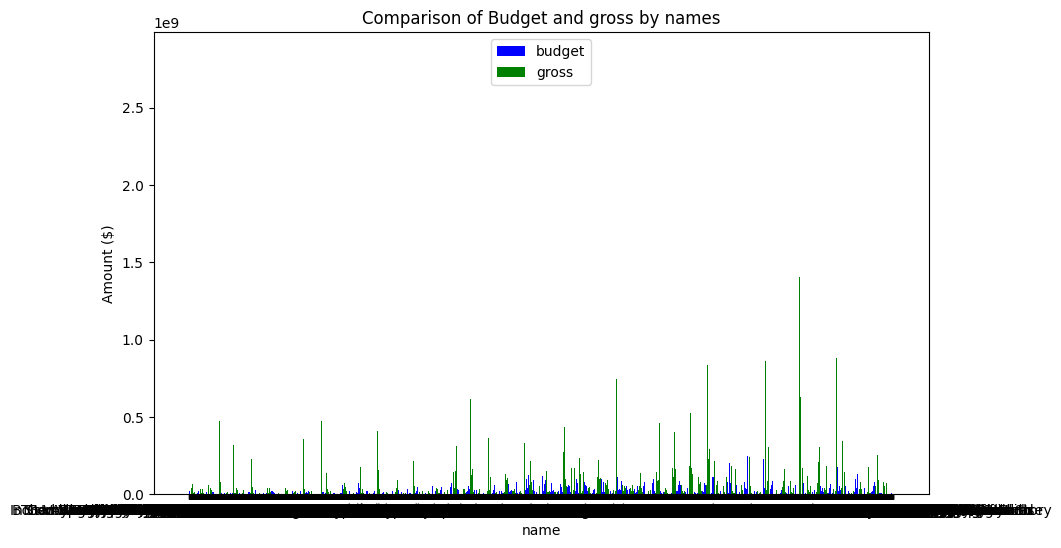

In [19]:
#graphs for budget and gross
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.50
index = np.arange(len(df))

ax.bar(index, df['budget'], bar_width, label='budget', color='blue')
ax.bar(index + bar_width, df['gross'], bar_width, label='gross', color='green')

ax.set_xlabel('name')
ax.set_ylabel('Amount ($)')
ax.set_title('Comparison of Budget and gross by names')
ax.set_xticks(index + bar_width / 2)

ax.set_xticklabels(x['name'])
ax.legend()

plt.show()

In [32]:
import pandas as pd
import numpy as np
df=pd.read_csv('movies.csv')

In [33]:
#question number 4
df['roi'] = (df['gross'] - df['budget']) / df['budget']

In [34]:
director_avg_roi= df.groupby("director")['roi'].mean()
director = director_avg_roi.idxmax()
print(f"Director with maximum average roi:{director, director_avg_roi.max()}")

Director with maximum average roi:('Oren Peli', 12889.386666666667)


In [35]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'roi'],
      dtype='object')

In [36]:
#question number 5
no_of_movies = df.groupby("star")['name'].count()
print(f"actor with maximum movies:{no_of_movies.idxmax(),no_of_movies.max()}")

actor with maximum movies:('Nicolas Cage', 43)


In [37]:
row1=df[df['star']=='Nicolas Cage']
print(f"genre : {row1['genre'].unique()}")


genre : ['Comedy' 'Biography' 'Action' 'Crime' 'Adventure' 'Drama' 'Horror'
 'Animation']


In [38]:
df['roi'] = (df['gross'] - df['budget']) / df['budget']
director_avg_roi= df.groupby("director")['roi'].mean()
director = director_avg_roi.idxmax()
print(f"Director with maximum average roi:{director, director_avg_roi.max()}")
no_of_movies = df.groupby("star")['name'].count()
print(f"actor with maximum movies:{no_of_movies.idxmax(),no_of_movies.max()}")
row1=df[df['star']=='Nicolas Cage']
row1['profit'] = row1['gross'] - row1['budget']  # Recalculate 'profit' for row1

print(f"genre : {row1['genre'].unique()}")
print(f"profit : {row1['profit']}")

Director with maximum average roi:('Oren Peli', 12889.386666666667)
actor with maximum movies:('Nicolas Cage', 43)
genre : ['Comedy' 'Biography' 'Action' 'Crime' 'Adventure' 'Drama' 'Horror'
 'Animation']
profit : 351      16993596.0
1001            NaN
1052     23180280.0
1308     -1274869.0
1661      5061425.0
1763     -7239549.0
2358     -5497449.0
2429            NaN
2498     17939757.0
2583            NaN
2660     28429928.0
3052    149012234.0
3277     30891409.0
3311    143685114.0
3491     56618699.0
3505    -38202809.0
3676    147202299.0
3701     64745083.0
3973      5112895.0
4070     13801173.0
4140    -37371735.0
4316      3565672.0
4490    247512318.0
4699     22617068.0
4813     -2873602.0
4924     98247198.0
4951     -1194620.0
5072    118738393.0
5084      7621983.0
5121    329242249.0
5373     -2512610.0
5485    133658498.0
5579    -14393578.0
5737     65283742.0
5929     -9090091.0
5939     75563930.0
5983     51627228.0
6011    -24882034.0
6202    -17584582.0
6283  

<ipython-input-38-d89f7416903c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row1['profit'] = row1['gross'] - row1['budget']  # Recalculate 'profit' for row1
